# Video Game Sales Analysis

In this project, I am aiming to analyze a video game sales file to uncover which games performed best overall.

I am also aiming to see which regions purchased the most, of which publisher and which genre.

The file I am using for this analysis is found here: https://www.kaggle.com/datasets/gregorut/videogamesales

### Importing all relevant packages for data analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading vgsales.csv into a pandas df.

In [102]:
vgsales_df = pd.read_csv('/Users/AlexandreRioux/Desktop/vgsales.csv')
vgsales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Data Exploration & Preparation

In [9]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
vgsales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
vgsales_df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

Double-checking if there are no null values.

In [13]:
vgsales_df.isna().sum()
# DataFrame has a few null values.
# Used print(vgsales_df[vgsales_df['Year'].isna()]) to view Year column where NaN values exist.
# Used print(vgsales_df[vgsales_df['Publisher'].isna()]) to view Publisher column where NaN values exist.

# 'Year' and 'Publisher' columns contain small amounts of missing data.
# Because I am analyzing sales, the minor values of these columns can be reasonably dropped.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
# Dropping Year column where values are NaN
vgsales_df = vgsales_df.dropna(subset=['Year'])
# Dropping Publisher column where values are NaN
vgsales_df = vgsales_df.dropna(subset=['Publisher'])

In [15]:
vgsales_df.isna().sum()
# There are no longer any null values.

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Data Analysis & Visualization

### Which video games were the top earners over this period?

In [18]:
# Grouping 'Name' and 'Global_Sales' columns & summing the sales.
top_earners = vgsales_df.groupby('Name')['Global_Sales'].sum().reset_index()
# Sorting the values in descending order.
top_earners = top_earners.sort_values(by='Global_Sales', ascending=False)
top_earners

,Name,Global_Sales
10849,Wii Sports,82.74
3650,Grand Theft Auto V,55.92
9201,Super Mario Bros.,45.31
9581,Tetris,35.84
5493,Mario Kart Wii,35.82
...,...,...
5415,Mahou Sensei Negima!? Neo-Pactio Fight!!,0.01
3174,Fit & Fun,0.01
9078,Strider (2014),0.01
6951,Pachi-Slot Teiou: Golgo 13 Las Vegas (JP sales...,0.01


In [39]:
# Creating a subset of the top earners df for visualization.
top_25_earners_df = top_earners.head(25).copy()
top_25_earners_df

,Name,Global_Sales
10849,Wii Sports,82.74
3650,Grand Theft Auto V,55.92
9201,Super Mario Bros.,45.31
9581,Tetris,35.84
5493,Mario Kart Wii,35.82
10851,Wii Sports Resort,33.00
7247,Pokemon Red/Pokemon Blue,31.37
1210,Call of Duty: Modern Warfare 3,30.83
6632,New Super Mario Bros.,30.01
1206,Call of Duty: Black Ops II,29.72


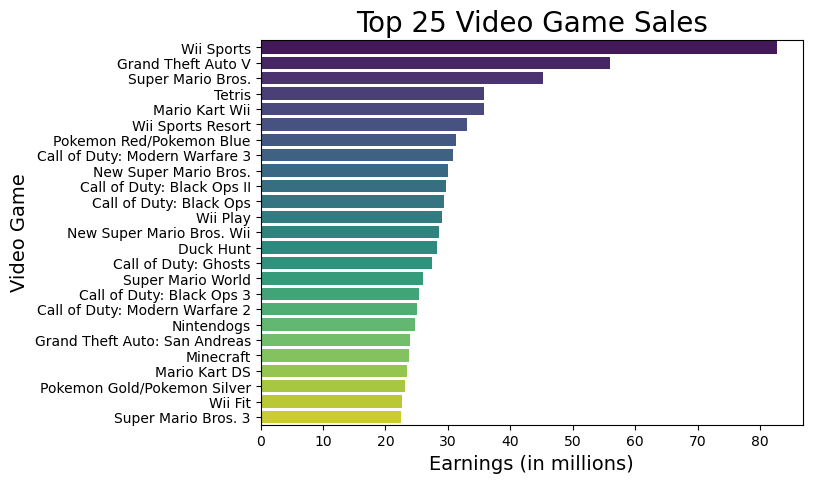

In [47]:
# For this visualization, I would like to show which top 25 games were the top earners.
top_25_earners_df = (vgsales_df.groupby(
    'Name')['Global_Sales'].sum().reset_index(name='Top Earners').sort_values(by='Top Earners', ascending=False).head(25))
# Configuring the bar plot for this dataset.
plt.figure(figsize=(7, 5))
sns.barplot(data=top_25_earners_df, x='Top Earners', y='Name', hue='Name', palette='viridis')
plt.xlabel('Earnings (in millions)', fontsize=14)
plt.ylabel('Video Game', fontsize=14)
plt.title('Top 25 Video Game Sales', fontsize=20)
plt.show()

Why was Wii Sports such a best seller? Let us look at the amount of Wii consoles games that appear on this list.

This may glean some insight as to why Wii Sports was such a dominant property (and why there are so many Wii titles in this subset).

In [74]:
# Grouping initial df among 'Platform' and 'Global_Sales'.
top_platforms = vgsales_df.groupby('Platform')['Global_Sales'].sum().reset_index()
# print(top_platforms) Let's group the top 8 platforms from this list.
# Sorting the platforms in descending order.
top_platforms = top_platforms.sort_values(by='Global_Sales', ascending=False)
# Creating a subset to include only top 8 platforms
top_8_platforms = top_platforms.head(8)
top_8_platforms

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39
6,GBA,305.62
19,PSP,291.71


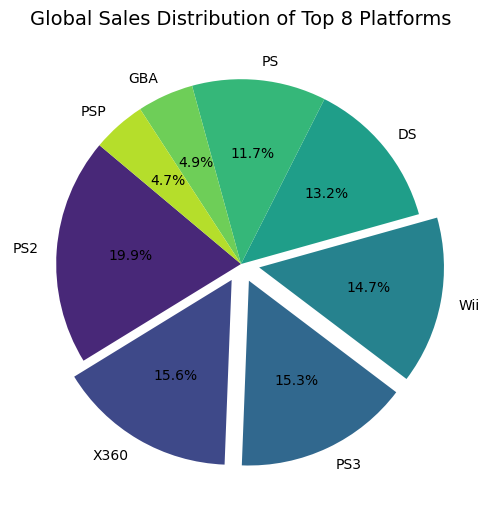

In [90]:
# Let's visualize this data by dividing it with its main competition.
# Data to use for this chart.
top_8_platforms = top_platforms.head(8)
# Configuring chart.
plt.figure(figsize=(6, 6))
explode = [0, 0.1, 0.1, 0.1, 0, 0, 0, 0]
# Labelling chart & displaying % representation.
plt.pie(top_8_platforms['Global_Sales'], explode=explode, labels=top_8_platforms['Platform'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(top_8_platforms)))
plt.title('Global Sales Distribution of Top 8 Platforms', fontsize=14)
plt.show()

Looking at this chart, we can see that the Wii console is quite middle of the road among these select platforms in terms of Global Sales.
Its main competitors (those exploded from the chart) are all consoles from the same generation as the Wii.
No statistical reason why this game sold so well. There is likely qualitative data not found in this dataset that explains why this is such a high grossing game.

#### To further my analysis, I would like to find which Region purchases the most video games.

In [116]:
# Creating a group consisting of all regional sales values.
avg_regional_sales = vgsales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean().reset_index()
avg_regional_sales.columns = ['Region', 'Average Sales']
print(avg_regional_sales)
# North America is the largest consumer of video games in this data set.

        Region  Average Sales
0     NA_Sales       0.264667
1     EU_Sales       0.146652
2     JP_Sales       0.077782
3  Other_Sales       0.048063


Let's explore further by analyzing which publisher & genre these regions consume the most. This might glean some insight into why Wii Sports is so popular.

In [123]:
# Grouping 'Publisher' & Regional Sales data
avg_publisher_sales = vgsales_df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean().reset_index()
print(avg_publisher_sales.sample(5))

                        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales
235                   Image Epoch  0.000000  0.000000  0.100000     0.000000
340                  Myelin Media  0.030000  0.013333  0.000000     0.003333
275  Konami Digital Entertainment  0.110769  0.083762  0.109736     0.036430
15                            ASK  0.000000  0.000000  0.030000     0.000000
27                         Agetec  0.097500  0.072500  0.047500     0.023750


In [125]:
# Grouping 'Genre' & Regional Sales data
avg_genre_sales = vgsales_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean().reset_index()
print(avg_genre_sales.sample(5))

        Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
2    Fighting  0.263667  0.119481  0.103007     0.043255
0      Action  0.264726  0.158323  0.048236     0.056508
9  Simulation  0.211430  0.130773  0.073472     0.036355
8     Shooter  0.444733  0.239137  0.029221     0.078389
6      Racing  0.287766  0.190865  0.045388     0.061865


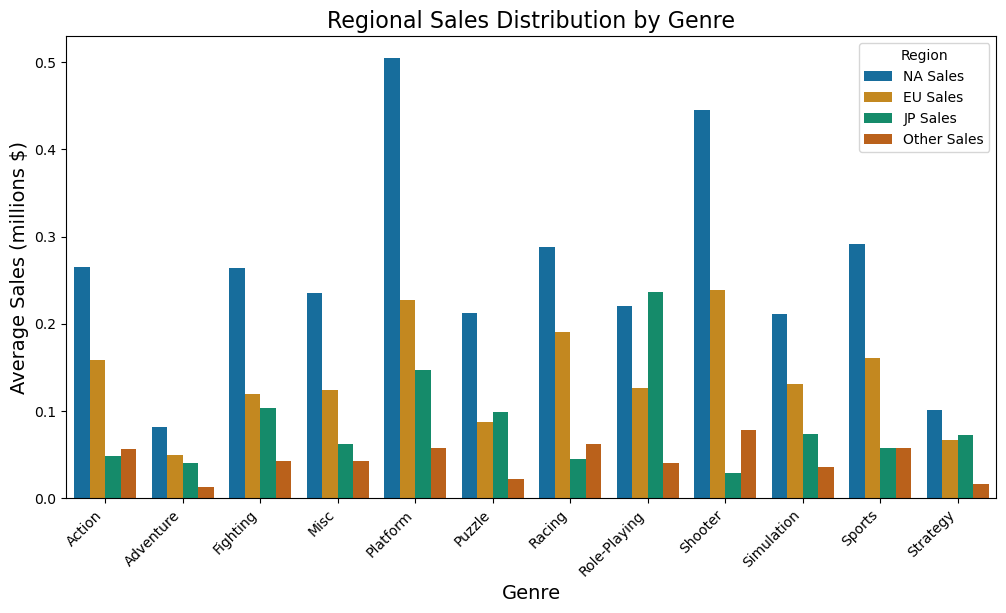

In [182]:
# Visualizing 'Genre' & Sales data with Seaborn
# Using .melt to reshape the data
avg_genre_sales_melted = avg_genre_sales.melt(id_vars=['Genre'], var_name='Region', value_name='Average Sales')

# Configuring plot
plt.figure(figsize=(12, 6))
sns_plot1 = sns.barplot(data=avg_genre_sales_melted, x='Genre', y='Average Sales', hue='Region', palette='colorblind')
plt.xticks(rotation=45, ha='right')
plt.title('Regional Sales Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Sales (millions $)', fontsize=14)
handles, labels = sns_plot1.get_legend_handles_labels()
plt.legend(title='Region', labels=['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'], handles=handles)
plt.show()

From this plot, we can assess a few different things:
- North Americans consumers statistically favor Platformers and Shooters.
- Europeans consumers statistically favor Shooters and Platformers.
- Japanese consumers statistically favor RPGs (Role-Playing Games) and Platformers.
- Other consumers statistically purchase Shooters.

Because we should expect Wii Sports to count in the 'Sports' genre, it is once again atypical for it to have such a high sales volume when this genre ranks lower among most combined Sales.

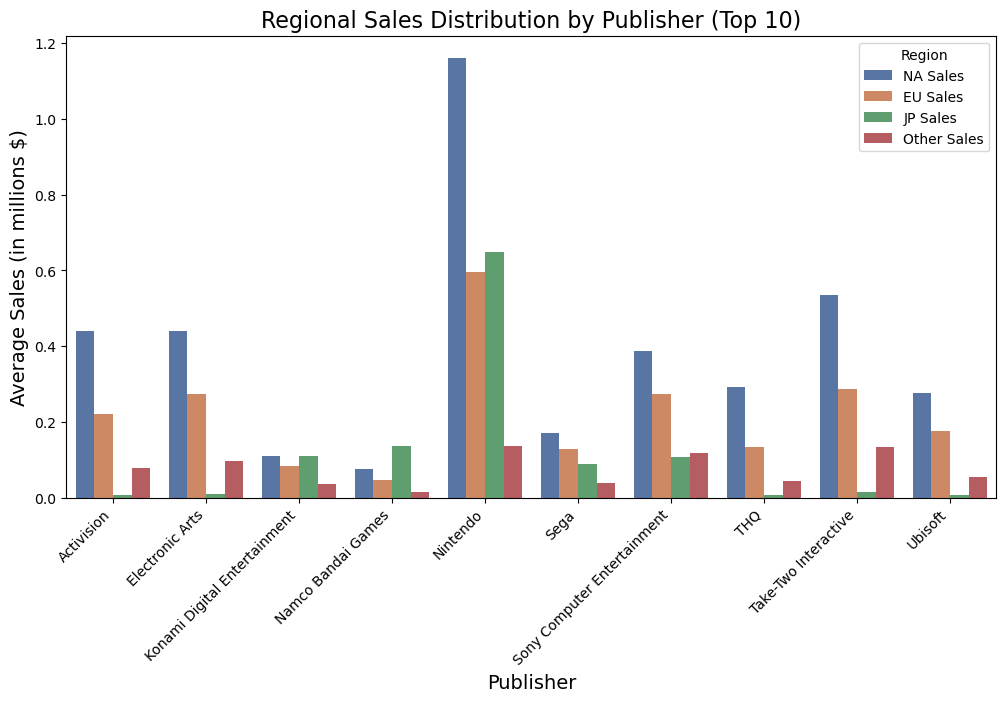

In [189]:
# Using Data from Publishers for plotting.
vgsales_df['Publisher'].nunique() # Sorting publishers down to the top 10 since there are 578 counts of Publishers.
top_10_publishers = vgsales_df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index
refined_publisher_sales = avg_publisher_sales[avg_publisher_sales['Publisher'].isin(top_10_publishers)]
# Reshaping for Seaborn
avg_publisher_sales_melted = refined_publisher_sales.melt(id_vars=['Publisher'], var_name='Region', value_name='Average Sales')

# Configuring the plot
plt.figure(figsize=(12, 6))
sns_plot2 = sns.barplot(data=avg_publisher_sales_melted, x='Publisher', y='Average Sales', hue='Region', palette='deep')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Regional Sales Distribution by Publisher (Top 10)', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Average Sales (in millions $)', fontsize=14)
handles, labels = sns_plot2.get_legend_handles_labels()
plt.legend(title='Region', labels=[ 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'], handles=handles)
plt.show()

Results from this visualization show that Nintendo is the predominantly preferred video game publishing company among all regions.

More data and more analysis are necessary to uncover the mystery of Wii Sports being such a huge hit.